In [7]:
def inputForLagrange():
    
    params = input('Список переменных через пробел : ')
    params = params.split(' ')
    if len(params) > 2:
        print('Введено более двух переменных')
    elif len(params) < 2 :
        print('Введено менее двух переменных')
    F = input('Функция в аналитическом виде :  ')
    L = input('Есть ли ограничения, 1 - да; 0 нет : ')
    if L == '1':
        lim1 = input(f'Ограничения для {params[0]} через пробел :  ')
        lim2 = input(f'Ограничения для {params[1]} через пробел :  ')
    elif L =='0':
        lim1 = ('999')
        lim2 = ('999')
    else :
        return 'Ошибка ввода наличия ограничений'
    lim1 = list(map(int, (lim1.split(' '))))
    lim2 = list(map(int, (lim2.split(' '))))

    Z = input('Ограничивающая функция :  ')
    Final = {'p1': params[0],
             'p2': params[1],
             'func': F,
             'lims1': lim1,
             'lims2': lim2,
             'Z' : Z}
    return Final

In [14]:
from sympy import *
def Lagrange(dictionary):
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator
    # преобразование данных для символьного вычислнения
    from sympy.parsing.sympy_parser import parse_expr
    data = dictionary
    func = data['func'] + ' + l *' + '(' + data['Z'] + ')'
    func = parse_expr(func)
    z = parse_expr(data['func'])
    p1 = data['p1']
    x = Symbol(p1)
    p2 = data['p2']
    y = Symbol(p2)
    l = Symbol('l')
    lim1 = data['lims1']
    lim2 = data['lims2']
    ## реализация метода
    
    dx = func.diff(p1)
    dy = func.diff(p2)
    dl = func.diff(l)
    points = solve((dx,dy,dl), [x,y,l],dict = True)
    
    M = Matrix([[0, z.diff(x), z.diff(y)],
                [z.diff(x), func.diff(x,2),func.diff(x,y)],
                [z.diff(y) , func.diff(x,y), func.diff(y,2)]])
    determinant = M.det()
    
    G = Matrix([[func.diff(x,2), func.diff(x,y)],
                [func.diff(x,y), func.diff(y,2)]])

    for i in points :
        if determinant.subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) > 0:
            print(i, 'условный максимум')
        elif determinant.subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) < 0:
            print(i , 'условный минимум')
        elif ((func.diff(x,2) > 0) * (G.det() > 0)) == 0 or ((func.diff(x,2) < 0) * (G.det() > 0)) == 0:
            print(i , 'седловая точка')
        else:
            print(i , 'требуется дополнительное исследование')    
        
    %matplotlib notebook

    plt.rcParams['figure.figsize'] = (8,6)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    if len(lim1) == 2 :
        xx = np.linspace(lim1[0] - 5, lim1[1] + 5, 1000)
        yy = np.linspace(lim2[0] - 5, lim2[1] + 5, 1000)
    
    else:
        xx = np.linspace(-20, 20, 1000)
        yy = np.linspace(-20, 20, 1000)
    
    X, Y = np.meshgrid(xx, yy)

    f = lambdify([x,y], z)
    Z = f(X,Y)

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5,
                       linewidth=1, antialiased=False)
    if len(lim1) == 2 :
        coord_x_p = np.array([i[x] for i in points if (int(i[x]) >= lim1[0] and int(i[x]) <= lim1[1])]) 
        coord_y_p = np.array([i[y] for i in points if (int(i[y]) >= lim2[0] and int(i[y]) <= lim2[1])])
        coord_z_p = f(coord_x_p, coord_y_p)
    else:
        coord_x_p = np.array([i[x] for i in points]) 
        coord_y_p = np.array([i[y] for i in points])
        coord_z_p = f(coord_x_p, coord_y_p)
    
    ax.scatter3D(coord_x_p, coord_y_p, coord_z_p,c = 'yellow', s=250, alpha=1)
    ax.set_xlabel(f'{x}')
    ax.set_ylabel(f'{y}')
    ax.set_zlabel(f'{z}')
    plt.show()

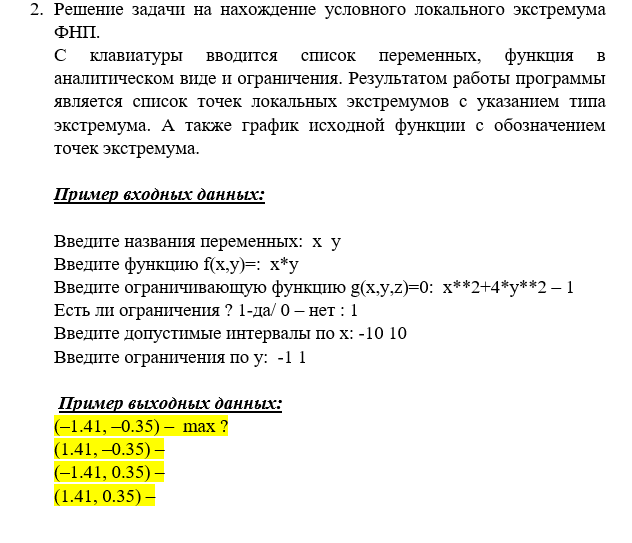

Список переменных через пробел : x y
Функция в аналитическом виде :  x*y
Есть ли ограничения, 1 - да; 0 нет : 1
Ограничения для x через пробел :  -10 10
Ограничения для y через пробел :  -1 1
Ограничивающая функция :  x**2+4*y**2-1
{x: -sqrt(2)/2, y: -sqrt(2)/4, l: -1/4} условный максимум
{x: sqrt(2)/2, y: sqrt(2)/4, l: -1/4} условный максимум
{x: -sqrt(2)/2, y: sqrt(2)/4, l: 1/4} условный минимум
{x: sqrt(2)/2, y: -sqrt(2)/4, l: 1/4} условный минимум


<IPython.core.display.Javascript object>


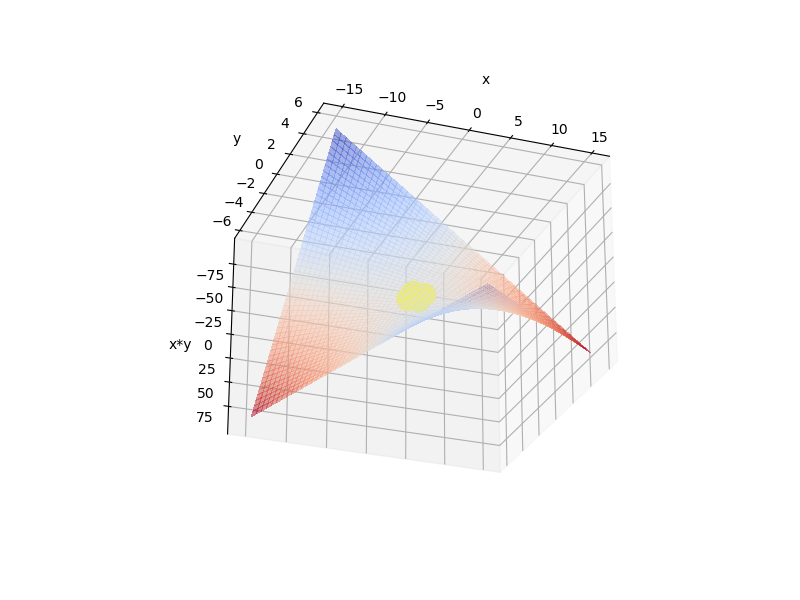

In [15]:
Lagrange(inputForLagrange())